In [112]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', titlesize=15, labelsize=15)
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'

In [113]:
f30 = r.TFile("./data/ClusterHist_30us.root")
f150 = r.TFile("./data/ClusterHist_150us.root")

In [114]:
f30.ls()

TFile**		./data/ClusterHist_30us.root	
 TFile*		./data/ClusterHist_30us.root	
  KEY: TCanvas	c1_n5;1	c1_n5


In [115]:
f150.ls()

TFile**		./data/ClusterHist_150us.root	
 TFile*		./data/ClusterHist_150us.root	
  KEY: TCanvas	c1_n6;1	c1_n6


In [116]:
c30 = f30.Get("c1_n5")
c150 = f150.Get("c1_n6")

In [117]:
print([x for x in c30.GetListOfPrimitives()])

[<ROOT.TH2D object ("counterHist") at 0x7fffed817c80>]


In [118]:
print([x for x in c150.GetListOfPrimitives()])

[<ROOT.TH2D object ("counterHist") at 0x7fffed7d9b60>]


In [119]:
h30 = c30.GetPrimitive("counterHist")
#h30.Scale(1/h30.GetEntries())
h30.Scale(1/h30.GetMaximum())
h30.SetDirectory(0)
h150 = c150.GetPrimitive("counterHist")
#h150.Scale(1/h150.GetEntries())
h150.Scale(1/h150.GetMaximum())
h150.SetDirectory(0)

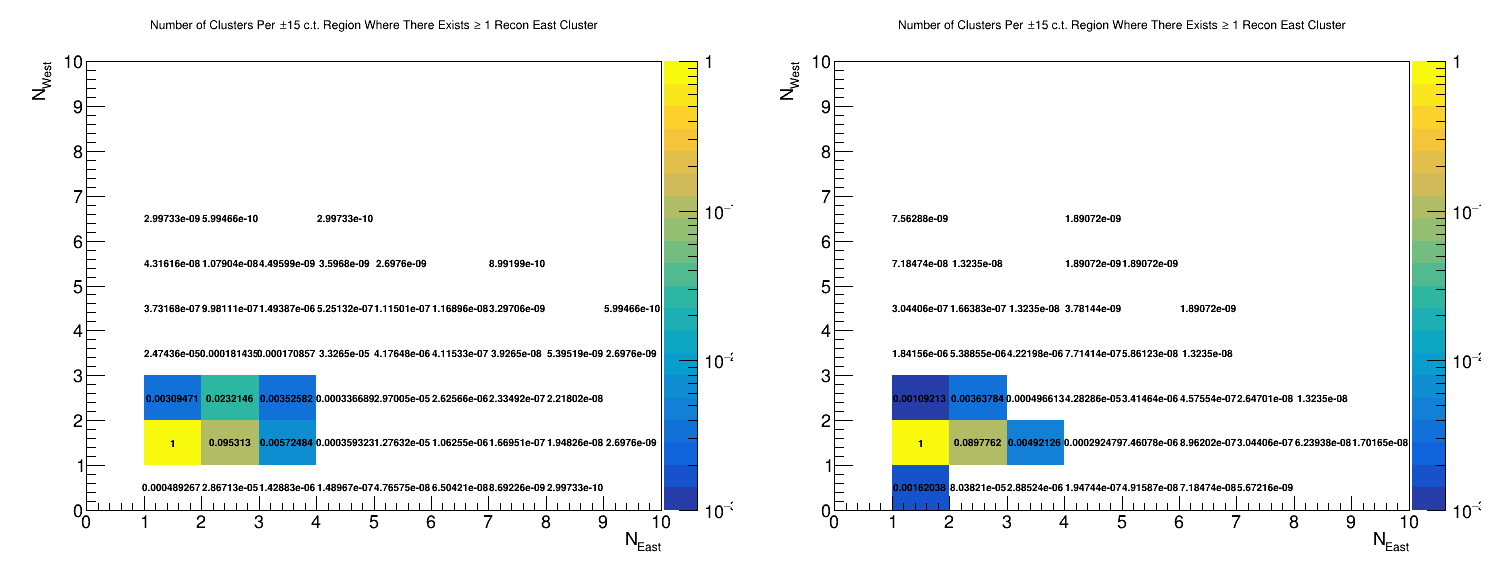

In [120]:
c = r.TCanvas("c","c",1500,600)
c.Divide(2)
c.cd(1)
h30.Draw("colz text")
r.gPad.SetLogz()
c.cd(2)
h150.Draw("colz text")
r.gPad.SetLogz()
c.Draw()

In [121]:
hdiff = h30.Clone()
hdiff.Reset()

hdiff.Add(h30,1)
hdiff.Add(h150,-1)
hdiff.Divide(h150)
#hdiff.Scale(1/hdiff.GetBinContent(2,2))

True

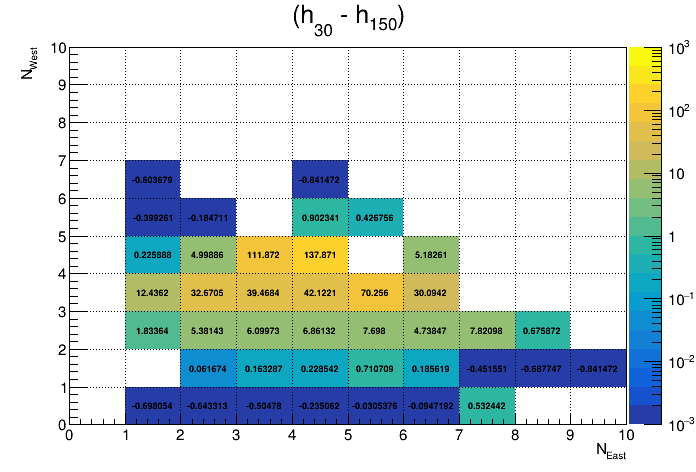

In [124]:
c = r.TCanvas()
hdiff.GetZaxis().SetRangeUser(0.001,1000)
hdiff.SetTitle("(h_{30} - h_{150})")
hdiff.Draw("colz text")
c.SetLogz()
c.SetGrid()
c.Draw()